In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from numpy.random import seed
from sklearn import metrics
seed(42)
from sklearn.metrics import confusion_matrix
from utils.metrics import evaluate
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model, svm
from utils.plots import bar_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
from prophet import Prophet
import seaborn as sns # Visualization
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV, cross_val_score

In [244]:
df = pd.read_csv('HODARM_data.csv')
datelist_train = list(df['Date'])
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date', inplace=True)


In [245]:
df.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Date,,,,,,,,,,,
2020-10-23,186,9,4,75.3,12,20,16,21,19,27,25
2020-10-24,181,7,2,76.0,14,15,17,21,18,38,25
2020-10-25,201,8,4,75.0,17,23,17,20,18,37,25
2020-10-26,198,8,2,76.0,11,0,14,18,24,32,25
2020-10-27,208,8,1,75.2,7,20,12,34,9,20,25


In [246]:
df.tail()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Date,,,,,,,,,,,
2022-03-16,24,0,0,80.0,1,6,6,31,39,37,0
2022-03-17,25,0,0,80.0,2,5,6,37,38,43,0
2022-03-18,28,0,0,82.0,1,7,6,39,32,45,0
2022-03-19,26,2,0,84.0,0,7,6,37,36,43,0
2022-03-20,23,2,0,80.0,0,6,6,50,23,56,0


In [247]:
df.shape

(514, 11)

In [248]:
df.columns.values

array(['Admission_Total', 'Mortality', 'U60_Mortality', 'O2_saturation',
       'ICU_ADD', 'Non_invasive_ventialion ', 'Inutabet_C19_Pt',
       'Non-intubated_C19_PT', 'Free_Ventilators', 'Using_Ventialtors',
       'Infected_paramedics'], dtype=object)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 514 entries, 2020-10-23 to 2022-03-20
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Admission_Total           514 non-null    int64  
 1   Mortality                 514 non-null    int64  
 2   U60_Mortality             514 non-null    int64  
 3   O2_saturation             514 non-null    float64
 4   ICU_ADD                   514 non-null    int64  
 5   Non_invasive_ventialion   514 non-null    int64  
 6   Inutabet_C19_Pt           514 non-null    int64  
 7   Non-intubated_C19_PT      514 non-null    int64  
 8   Free_Ventilators          514 non-null    int64  
 9   Using_Ventialtors         514 non-null    int64  
 10  Infected_paramedics       514 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 48.2 KB


In [250]:
df.describe()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,102.361868,2.698444,0.799611,81.961284,5.902724,13.756809,7.332685,26.066148,27.064202,33.229572,5.367704
std,84.547698,2.938041,2.768649,5.454737,8.857672,10.161906,5.347224,7.945201,12.227289,6.247481,8.265750
min,7.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.000000,0.000000
25%,30.000000,0.000000,0.000000,80.000000,0.000000,6.000000,3.000000,21.000000,21.000000,29.000000,1.000000
50%,72.000000,2.000000,0.000000,81.000000,1.000000,10.000000,6.000000,25.000000,25.000000,33.000000,2.000000
75%,173.000000,4.000000,1.000000,85.000000,9.000000,21.000000,11.000000,31.000000,31.000000,37.000000,6.000000
max,333.000000,18.000000,58.000000,93.300000,47.000000,43.000000,25.000000,50.000000,214.000000,56.000000,55.000000


In [251]:
def miss_data(x):
    total = x.isnull().sum()
    percent = (x.isnull().sum()/x.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(x[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [252]:
miss_data(df)

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


In [253]:
for x in df.columns:
    if df[x].dtype=='int64' or  df[x].dtype=='float64':
        df[x].fillna(df[x].mean())

df = df.fillna(-999)

for y in df.columns:
    if df[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[y].values))
        df[y] = lbl.transform(list(df[y].values))

In [254]:
threshold = 0.92
corr_matrix = df.corr().abs()
corr_matrix.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Admission_Total,1.000000,0.711889,0.193374,0.570171,0.859985,0.872307,0.795409,0.635542,0.186492,0.136633,0.468613
Mortality,0.711889,1.000000,0.276289,0.507063,0.601474,0.628571,0.648380,0.522061,0.151882,0.128439,0.354784
U60_Mortality,0.193374,0.276289,1.000000,0.146382,0.189257,0.165380,0.181476,0.130547,0.042230,0.022466,0.095390
O2_saturation,0.570171,0.507063,0.146382,1.000000,0.383016,0.497883,0.577161,0.250193,0.023059,0.163494,0.303749
ICU_ADD,0.859985,0.601474,0.189257,0.383016,1.000000,0.762998,0.678156,0.461118,0.144973,0.018688,0.400442


In [255]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Admission_Total,Mortality,U60_Mortality,O2_saturation,ICU_ADD,Non_invasive_ventialion,Inutabet_C19_Pt,Non-intubated_C19_PT,Free_Ventilators,Using_Ventialtors,Infected_paramedics
Admission_Total,NaN,0.711889,0.193374,0.570171,0.859985,0.872307,0.795409,0.635542,0.186492,0.136633,0.468613
Mortality,NaN,NaN,0.276289,0.507063,0.601474,0.628571,0.648380,0.522061,0.151882,0.128439,0.354784
U60_Mortality,NaN,NaN,NaN,0.146382,0.189257,0.165380,0.181476,0.130547,0.042230,0.022466,0.095390
O2_saturation,NaN,NaN,NaN,NaN,0.383016,0.497883,0.577161,0.250193,0.023059,0.163494,0.303749
ICU_ADD,NaN,NaN,NaN,NaN,NaN,0.762998,0.678156,0.461118,0.144973,0.018688,0.400442


In [256]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
df = df.drop(columns = to_drop)
print('Data shape: ', df.shape)
print('Size of the data', df.shape)

There are 0 columns to remove.
Data shape:  (514, 11)
Size of the data (514, 11)


In [257]:
X = df.drop(['Admission_Total'], axis=1)
y = df['Admission_Total']

In [258]:
# Split 30% for test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [259]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(359, 10) (155, 10) (359,) (155,)


In [260]:
resultsDict = {}
predictionsDict = {}

In [261]:
cols = X_train.columns
scaler = MinMaxScaler(feature_range=(0, 1))
t_X_train = scaler.fit_transform(X_train)
t_X_test = scaler.transform(X_test)
X_train = pd.DataFrame(t_X_train, columns=[cols])
X_test = pd.DataFrame(t_X_test, columns=[cols])


### Bayesian regression

In [262]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(y_test, yhat)
predictionsDict['BayesianRidge'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))


Mean squared error: 657.64


### Lesso

In [263]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Lasso'] = evaluate(y_test, yhat)
predictionsDict['Lasso'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 669.65


### Random Forest

In [264]:
reg = RandomForestRegressor(n_estimators=100,random_state=137)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['RandomForest'] = evaluate(y_test, yhat)
predictionsDict['RandomForest'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 321.14


###  XGBoost

In [265]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(y_test, yhat)
predictionsDict['XGBoost'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 430.83


### Support vector machines

In [266]:
reg = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM RBF'] = evaluate(y_test, yhat)
predictionsDict['SVM RBF'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 661.79


### Nearest neighbors

In [267]:
reg = neighbors.KNeighborsRegressor(10, weights='distance', metric='euclidean')
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['KNN'] = evaluate(y_test, yhat)
predictionsDict['KNNF'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 490.08


### LinearRegression

In [268]:
reg = linear_model.LinearRegression(normalize=False)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['LinearRegression'] = evaluate(y_test, yhat)
predictionsDict['LinearRegression'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 654.23


### MLP

In [269]:
reg = MLPRegressor(hidden_layer_sizes=(75, 25), learning_rate='adaptive', verbose=True,
                   activation='relu', solver='lbfgs', max_iter=500)

reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['MLP'] = evaluate(y_test, yhat)
predictionsDict['MLP'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 376.79


### DecisionTreeClassifier

In [270]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['DecisionTreeClassifier'] = evaluate(y_test, yhat)
predictionsDict['DecisionTreeClassifier'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 1150.75


### Linear Discriminant Analyser Model


In [271]:
reg = LinearDiscriminantAnalysis()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['LDA'] = evaluate(y_test, yhat)
predictionsDict['LDA'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 745.31


###  Grid search - SVM

In [272]:
reg = GridSearchCV(svm.SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM RBF GRID SEARCH'] = evaluate(y_test, yhat)
predictionsDict['SVM RBF GRID SEARCH'] = yhat
print("Mean squared error: %.2f" % np.mean((yhat - y_test) ** 2))

Mean squared error: 463.65


### LSTM

In [278]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Admission_Total'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .7 ))

training_data_len

360

In [279]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(514, 1)

In [280]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape
x_train.shape


[array([0.54907975, 0.53374233, 0.59509202, 0.58588957, 0.61656442,
       0.62883436, 0.63190184, 0.60736196, 0.60736196, 0.63190184,
       0.55521472, 0.57055215, 0.61349693, 0.60122699, 0.61042945,
       0.60736196, 0.6196319 , 0.61042945, 0.59509202, 0.58282209,
       0.56748466, 0.53680982, 0.54294479, 0.5797546 , 0.59815951,
       0.58895706, 0.55828221, 0.54907975, 0.55828221, 0.54601227,
       0.55214724, 0.50920245, 0.49079755, 0.44478528, 0.42638037,
       0.40797546, 0.36196319, 0.37730061, 0.32208589, 0.31288344,
       0.2791411 , 0.30368098, 0.28527607, 0.28527607, 0.29141104,
       0.25460123, 0.21472393, 0.19631902, 0.16564417, 0.13803681,
       0.12269939, 0.14723926, 0.17177914, 0.15030675, 0.16564417,
       0.14417178, 0.13190184, 0.13496933, 0.12269939, 0.11349693])]
[0.09815950920245399]

[array([0.54907975, 0.53374233, 0.59509202, 0.58588957, 0.61656442,
       0.62883436, 0.63190184, 0.60736196, 0.60736196, 0.63190184,
       0.55521472, 0.57055215, 0.61

(300, 60, 1)

In [281]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=28)

Epoch 1/28
30/30 [==============================] - 5s 32ms/step - loss: 0.0261
Epoch 2/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0054
Epoch 3/28
30/30 [==============================] - 1s 33ms/step - loss: 0.0030
Epoch 4/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0029
Epoch 5/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0029
Epoch 6/28
30/30 [==============================] - 1s 31ms/step - loss: 0.0026
Epoch 7/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0025
Epoch 8/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0025
Epoch 9/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0032
Epoch 10/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0022
Epoch 11/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 12/28
30/30 [==============================] - 1s 32ms/step - loss: 0.0018
Epoch 13/28
30/30 [==================

In [282]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# x_test.shape
print(x_test.shape)
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

(154, 60, 1)
5/5 [==============================] - 2s 19ms/step


7.8986362324627

In [283]:

resultsDict['LSTM'] = evaluate(y_test, predictions)
predictionsDict['LSTM'] = predictions
np.sqrt(np.mean(((predictions - y_test) ** 2)))

7.8986362324627

## Ensembling


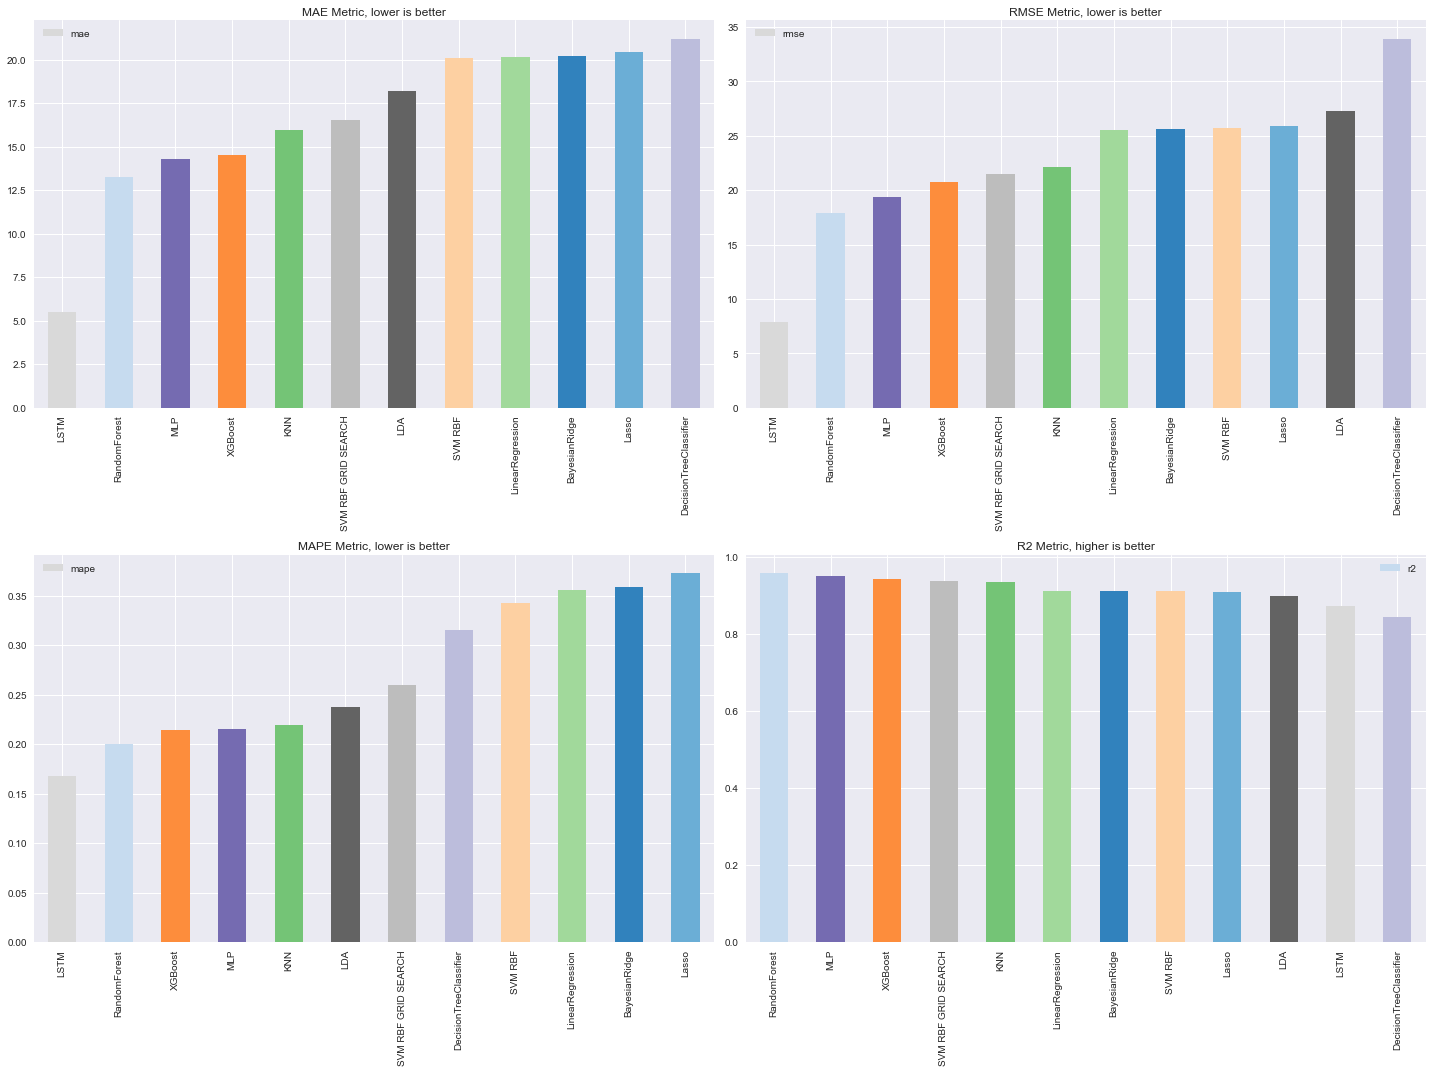

In [294]:
bar_metrics(resultsDict)

In [295]:
resultsDict

{'BayesianRidge': {'mae': 20.217144191870677,
  'rmse': 25.64443323242818,
  'mape': 0.35904070775087055,
  'r2': 0.911191268448325},
 'Lasso': {'mae': 20.46824792278761,
  'rmse': 25.877539131980836,
  'mape': 0.3723082850719863,
  'r2': 0.909569401579929},
 'RandomForest': {'mae': 13.28329032258064,
  'rmse': 17.920302614812393,
  'mape': 0.20057375773203293,
  'r2': 0.9566329245916007},
 'XGBoost': {'mae': 14.517658805847168,
  'rmse': 20.756400100877563,
  'mape': 0.21373795275021196,
  'r2': 0.941820025852927},
 'SVM RBF': {'mae': 20.102305872303738,
  'rmse': 25.725277404392994,
  'mape': 0.3426902364627219,
  'r2': 0.910630446123566},
 'KNN': {'mae': 15.949080154271456,
  'rmse': 22.1376725720464,
  'mape': 0.2188906130987347,
  'r2': 0.933818992212386},
 'LinearRegression': {'mae': 20.13215498380289,
  'rmse': 25.577885088831735,
  'mape': 0.3560821930468718,
  'r2': 0.9116515935233038},
 'MLP': {'mae': 14.304143671192158,
  'rmse': 19.411135202836302,
  'mape': 0.2156720091151

In [296]:
plt.style.use('seaborn')

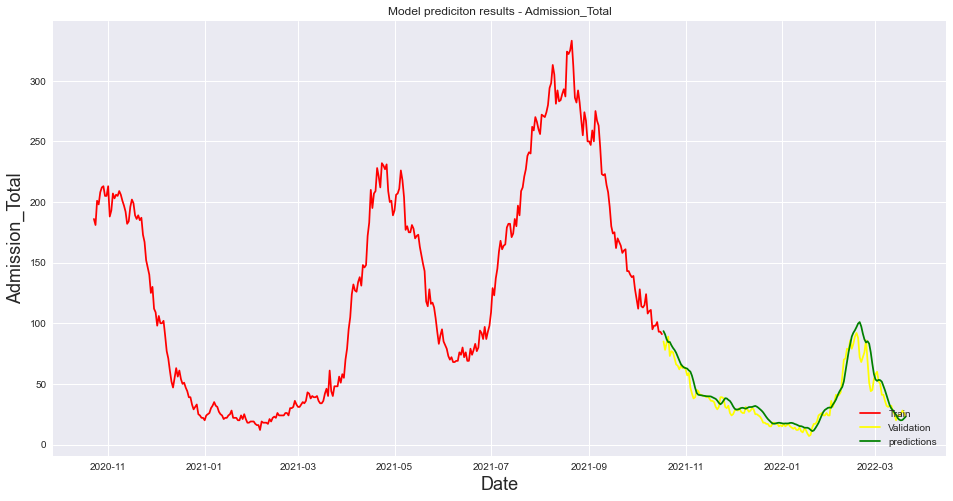

In [297]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - Admission_Total')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Admission_Total', fontsize=18)
plt.plot(train['Admission_Total'] , color='red')
plt.plot(valid['Admission_Total'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.show()

In [298]:
valid

,Admission_Total,predictions
Date,,
2021-10-18,85,93.523140
2021-10-19,78,90.834549
2021-10-20,84,86.709251
2021-10-21,89,84.411705
2021-10-22,73,84.566376
...,...,...
2022-03-16,24,20.497904
2022-03-17,25,19.935951
2022-03-18,28,20.200230


### Predict the next 20 days

In [305]:
datelist_future = pd.date_range(start='2022/03/21',periods=20, freq='1d').tolist()

In [306]:
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())


In [307]:
# ---> Special function: convert  to 
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')

In [308]:
predictions_future = model.predict(x_test[-20:])


1/1 [==============================] - 0s 35ms/step


In [309]:
y_pred_future = scaler.inverse_transform(predictions_future)
y_pred_future

array([[53.61289 ],
       [52.47654 ],
       [53.363605],
       [53.030148],
       [51.79083 ],
       [48.349903],
       [44.696957],
       [40.5555  ],
       [36.146675],
       [32.29895 ],
       [29.713545],
       [28.237917],
       [26.48232 ],
       [24.579975],
       [21.955435],
       [20.497904],
       [19.935951],
       [20.20023 ],
       [21.562283],
       [22.822397]], dtype=float32)

In [310]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Admission_Total']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE

,Admission_Total
2022-03-21,53.612888
2022-03-22,52.476540
2022-03-23,53.363605
2022-03-24,53.030148
2022-03-25,51.790829
2022-03-26,48.349903
2022-03-27,44.696957
2022-03-28,40.555500
2022-03-29,36.146675
2022-03-30,32.298950


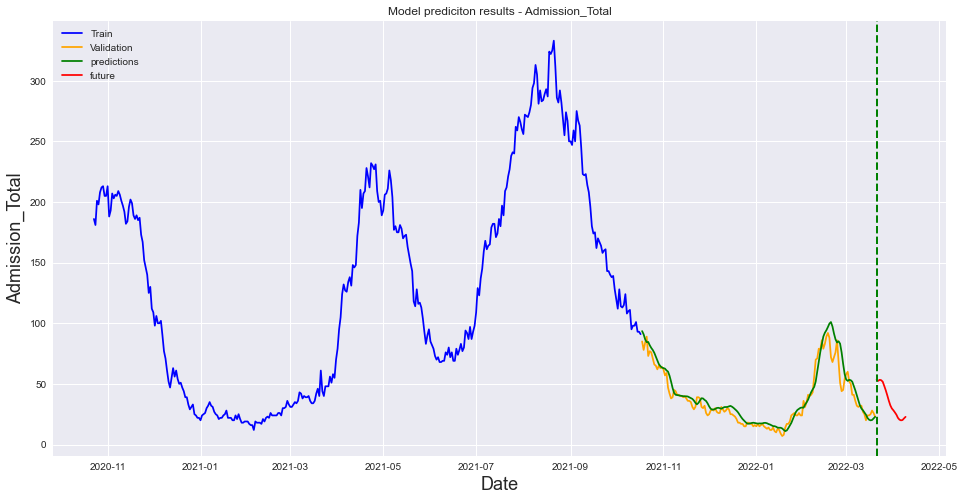

In [311]:
# Set plot size 
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - Admission_Total')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Admission_Total', fontsize=18)
plt.plot(train['Admission_Total'] , color='blue')
plt.plot(valid['Admission_Total'] , color='orange')
plt.plot(valid[ 'predictions'] , color='green')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Admission_Total'], color='r', label='Predicted Admission_Total')

plt.legend(['Train','Validation', 'predictions','future'], loc='upper left')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')
plt.show()
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5




